In [1]:
from predictor.Predictor import *
from predictor.Visualizer import *
from predictor.Analyzer import *
from predictor.EnzymeFinder import *

import os, multiprocessingq3 2

In [2]:
HUMAN_EVIDENCES=pd.read_csv('../databases/Human/bigg_Recon3D_evidences.tsv',sep='\t')
MICROBIOME_EVIDENCES=pd.read_csv('../databases/GutMicrobiome/microbes_reactions.tsv',sep='\t')
RULES_DATABASE = pd.read_csv('../databases/ReactionRules/ALL_RULES.tsv.gz',sep='\t',compression='gzip')

In [3]:
HUMAN_EVIDENCES=HUMAN_EVIDENCES[['source', 'name', 'ec', 'mnx_id', 'organisms_count', 'xrefs', 'origin','complexes_count']]
HUMAN_EVIDENCES=HUMAN_EVIDENCES.groupby('mnx_id')['source','name','ec','origin','xrefs'].agg(lambda x: ';'.join([i for i in set(x) if isinstance(i,str)])).reset_index()
HUMAN_EVIDENCES

,mnx_id,source,name,ec,origin,xrefs
0,MNXR01,,,,Human,
1,MNXR02,EX_h_e,H+ exchange,,Human,mnx:MNXR02;MNXR02;bigg.reaction:EX_h_e;bigg.re...
2,MNXR03,HMR_1095;Htg;Ht;Htr;Htmi;Htx,"HMR 1095;H transporter, peroxisome;H transport...",,Human,mnx:MNXR03;MNXR03;bigg.reaction:HMR_1095;bigg....
3,MNXR100000,GALNACT5g,Uridine diphosphoacetylgalactosamine-chondroit...,,Human,biggR:GALNACT5g;bigg.reaction:GALNACT5g;bigg.r...
4,MNXR100001,NAGA2ly;GALNTg,"GalNAc transferase, Golgi apparatus;N-acetylga...",,Human,biggR:GALNTg;bigg.reaction:GALNTg;bigg.reactio...
...,...,...,...,...,...,...
7736,MNXR99982,GALGT4,"Beta-1,4 N-acetylgalactosaminyltransferase",,Human,biggR:GALGT4;bigg.reaction:GALGT4;bigg.reactio...
7737,MNXR99995,GALNACT1g,UDPGal-chondroitin acetylgalactosaminyltransfe...,,Human,biggR:GALNACT1g;bigg.reaction:GALNACT1g;bigg.r...
7738,MNXR99997,GALNACT2g,Uridine diphosphoacetylgalactosamine-chondroit...,,Human,biggR:GALNACT2g;bigg.reaction:GALNACT2g;bigg.r...
7739,MNXR99998,GALNACT3g,Uridine diphosphoacetylgalactosamine-chondroit...,,Human,biggR:GALNACT3g;bigg.reaction:GALNACT3g;bigg.r...


In [11]:
reaction_rules=RULES_DATABASE[RULES_DATABASE.reaction_id.isin(HUMAN_EVIDENCES.mnx_id.unique())]

In [12]:
reaction_rules=pd.concat([reaction_rules,RULES_DATABASE[RULES_DATABASE.reaction_id.isin(MICROBIOME_EVIDENCES.mnx_id.unique())]])
reaction_rules=pd.concat([reaction_rules,RULES_DATABASE[RULES_DATABASE.reaction_id.isin(MICROBIOME_EVIDENCES.source.unique())]])
reaction_rules.drop_duplicates(ignore_index=True,inplace=True)
reaction_rules

,num_atoms,rule,reaction_id,substrate,substrate_map,product,product_map
0,4,[#6&!R:35]-[#6&!R:36](=[#8&!R:37])-[#7&!R:42]>...,MNXR100024,MNXM37,[NH3+:32][CH:33]([CH2:34][CH2:35][C:36](=[O:37...,MNXM741173,[NH3+:32][CH:33]([CH2:34][CH2:35][C:36](=[O:37...
1,5,[#6&!R:34]-[#6&!R:35]-[#6&!R:36](=[#8&!R:37])-...,MNXR100024,MNXM37,[NH3+:32][CH:33]([CH2:34][CH2:35][C:36](=[O:37...,MNXM741173,[NH3+:32][CH:33]([CH2:34][CH2:35][C:36](=[O:37...
2,6,[#6&!R:33]-[#6&!R:34]-[#6&!R:35]-[#6&!R:36](=[...,MNXR100024,MNXM37,[NH3+:32][CH:33]([CH2:34][CH2:35][C:36](=[O:37...,MNXM741173,[NH3+:32][CH:33]([CH2:34][CH2:35][C:36](=[O:37...
3,8,[#7&+&!R:32]-[#6&!R:33](-[#6&!R:34]-[#6&!R:35]...,MNXR100024,MNXM37,[NH3+:32][CH:33]([CH2:34][CH2:35][C:36](=[O:37...,MNXM741173,[NH3+:32][CH:33]([CH2:34][CH2:35][C:36](=[O:37...
4,10,[#7&+&!R:32]-[#6&!R:33](-[#6&!R:34]-[#6&!R:35]...,MNXR100024,MNXM37,[NH3+:32][CH:33]([CH2:34][CH2:35][C:36](=[O:37...,MNXM741173,[NH3+:32][CH:33]([CH2:34][CH2:35][C:36](=[O:37...
...,...,...,...,...,...,...,...
47078,7,[#7&!R:1](-[#6&R1&R&a:2])-[#6&R1&R:19]1-[#8&R1...,ANPRTr,pran,[NH:1]([c:2]1[cH:3][cH:4][cH:5][cH:6][c:7]1[C:...,prpp,[O:11]=[P:12]([O-:13])([O-:14])[O:15][CH2:16][...
47079,15,[#7&!R:1](-[#6&R1&R&a:2]1:[#6&R1&R&a:3]:[#6&R1...,ANPRTr,pran,[NH:1]([c:2]1[cH:3][cH:4][cH:5][cH:6][c:7]1[C:...,prpp,[O:11]=[P:12]([O-:13])([O-:14])[O:15][CH2:16][...
47080,17,[#7&!R:1](-[#6&R1&R&a:2]1:[#6&R1&R&a:3]:[#6&R1...,ANPRTr,pran,[NH:1]([c:2]1[cH:3][cH:4][cH:5][cH:6][c:7]1[C:...,prpp,[O:11]=[P:12]([O-:13])([O-:14])[O:15][CH2:16][...
47081,20,[#7&!R:1](-[#6&R1&R&a:2]1:[#6&R1&R&a:3]:[#6&R1...,ANPRTr,pran,[NH:1]([c:2]1[cH:3][cH:4][cH:5][cH:6][c:7]1[C:...,prpp,[O:11]=[P:12]([O-:13])([O-:14])[O:15][CH2:16][...


In [ ]:
DATA=pd.concat([HUMAN_EVIDENCES[['source', 'name', 'ec', 'mnx_id', 'organisms_count', 'xrefs', 'origin','complexes_count']],MICROBIOME_EVIDENCES])

In [ ]:
DATA=pd.concat([HUMAN_EVIDENCES[['source', 'name', 'ec', 'mnx_id', 'organisms_count', 'xrefs', 'origin','complexes_count']],MICROBIOME_EVIDENCES])
ALL_EVIDENCES=DATA.groupby('mnx_id')['source','name','ec','origin','xrefs'].agg(lambda x: ';'.join([i for i in set(x) if isinstance(i,str)])).reset_index()
ALL_EVIDENCES

In [ ]:
reaction_rules=RULES_DATABASE[RULES_DATABASE.mnx_id.isin(ALL_EVIDENCES.mnx_id.unique())]
reaction_rules

In [13]:
reaction_rules=reaction_rules[reaction_rules.num_atoms>=2]

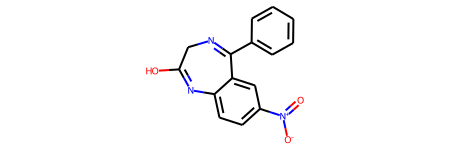

In [25]:
smi="OC1=Nc2ccc(cc2C(=NC1)c1ccccc1)[N+]([O-])=O"
name='Nitrofurantoine'
query=Chem.MolFromSmiles(smi)
query

# Meabolite Predictor

In [26]:
Predictor=MetabolitePredictor(rules_table=reaction_rules)
Predictor.run_prediction(query,name=name)

  0%|          | 0/47083 [00:00<?, ?it/s]

In [27]:
mets=Predictor.unique_metabolites
#mets=mets.merge(ALL_EVIDENCES,on='mnx_id',how='inner')
mets

,main_product_smiles,secondary_products_smiles,similarity_substrates,similarity_products,reacting_atoms_in_query,reaction_id,substrate,product,num_atoms,reacting_atoms_efficiency,confidence_score,metabolite_id
0,[NH3+]c1ccc2c(c1)C(c1ccccc1)=NCC(O)=N2,O.[OH-].NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=...,1.000,1.000,"[18, 6, 5, 4, 3, 8, 7, 9, 12, 17, 16, 15, 14, ...",NZP_NR,nzp,anzp,21,1.000,3.000,Nitrofurantoine_1
1,Nc1ccn(C2OC(COP(=O)([O-])OC3=Nc4ccc([N+](=O)[O...,O=P([O-])([O-])OP(=O)([O-])O,0.233,0.703,"[1, 0]",MNXR152785,MNXM1106046,MNXM1103953,2,0.095,1.031,Nitrofurantoine_2
2,O=[N+]([O-])c1ccc2c(c1)C(c1ccccc1O)=NCC(O)=N2,NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...,0.345,0.391,"[16, 15, 14, 13, 12, 17]",MNXR153872,MNXM744660,MNXM744413,6,0.286,1.022,Nitrofurantoine_3
3,O=[N+]([O-])c1ccc2c(c1)C(c1cccc(O)c1)=NCC(O)=N2,NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...,0.345,0.376,"[15, 16, 17, 12, 13, 14]",MNXR153872,MNXM744660,MNXM744413,6,0.286,1.007,Nitrofurantoine_4
4,O=C(O)C1OC(OC2=Nc3ccc([N+](=O)[O-])cc3C(c3cccc...,O,0.345,0.564,"[1, 0]",MNXR154834,MNXM744660,MNXM744661,2,0.095,1.004,Nitrofurantoine_5
...,...,...,...,...,...,...,...,...,...,...,...,...
99,CCCCCCCCCCCC(=O)OC1=Nc2ccc([N+](=O)[O-])cc2C(c...,O,0.131,0.208,"[0, 1]",MNXR158766,MNXM726122,MNXM744571,2,0.095,0.434,Nitrofurantoine_100
100,CCCCCCCCCCCCCCCCCC(=O)OC1=Nc2ccc([N+](=O)[O-])...,O,0.131,0.208,"[0, 1]",MNXR163356,MNXM726122,MNXM736463,2,0.095,0.434,Nitrofurantoine_101
101,O=[N+]([O-])c1ccc2c(c1)C(c1ccccc1)=NCC(OCC(O)C...,O,0.114,0.210,"[0, 1]",MNXR145573,MNXM1108176,MNXM738847,2,0.095,0.419,Nitrofurantoine_102
102,CC(C)(C#N)OC1=Nc2ccc([N+](=O)[O-])cc2C(c2ccccc...,O,0.114,0.186,"[0, 1]",MNXR149043,MNXM1137670,MNXM7214,2,0.095,0.395,Nitrofurantoine_103


In [28]:
mets.reaction_id.unique()

array(['NZP_NR', 'MNXR152785', 'MNXR153872', 'MNXR154834', 'MNXR159773',
       'MNXR146575', 'MNXR154112', 'MNXR154832', 'MNXR159775',
       'MNXR154069', 'MNXR148859', 'MNXR155372', 'MNXR162999',
       'MNXR148198', 'MNXR134405', 'MNXR108938', 'MNXR143342',
       'MNXR103697', 'MNXR188173', 'MNXR188692', 'MNXR146653',
       'MNXR148855', 'MNXR96155', 'MNXR149955', 'MNXR162725',
       'MNXR190944', 'MNXR139466', 'MNXR148696', 'MNXR190609',
       'MNXR110130', 'MNXR97774', 'MNXR158839', 'MNXR100150',
       'MNXR189261', 'MNXR111056', 'MNXR107653', 'CAP_NR', 'MNXR190670',
       'MNXR144928', 'MNXR146221', 'MNXR147555', 'MNXR108747',
       'MNXR146225', 'MNXR149150', 'MNXR148370', 'MNXR148366',
       'MNXR110650', 'MNXR148752', 'MNXR116015', 'MNXR110983',
       'MNXR107245', 'MNXR148285', 'MNXR188421', 'MNXR147306',
       'MNXR102084', 'MNXR158867', 'MNXR151174', 'MNXR191252',
       'MNXR106655', 'MNXR162452', 'MNXR103720', 'MNXR105449',
       'MNXR158759', 'MNXR105448', 'M

In [19]:
mets[mets.reaction_id=='CZP_NR']

,main_product_smiles,secondary_products_smiles,similarity_substrates,similarity_products,reacting_atoms_in_query,reaction_id,substrate,product,num_atoms,reacting_atoms_efficiency,confidence_score,metabolite_id
29,[NH3+]c1ccc(C=NN2CC(O)=NC2=O)o1,O.[OH-].NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=...,0.257,0.203,"[11, 6]",CZP_NR,czp,7a_czp,4,0.235,0.695,Nitrofurantoine_30


# Visualizer

In [ ]:
View=Visualizer(mets,query=query,name=name)
View.plot_confidence_scores()

In [ ]:
F=View.plot_evidences(nodes=['mnx_id','origin','name','ec','metabolite_id'])
F

In [ ]:
ma=View.plot_metabolic_accesibility()

In [ ]:
View.display_metabolites(columns_to_display=['mnx_id','source','ec','name'])

# Chemical Analysis

In [ ]:
Analysis=Analyzer(Predictor.unique_metabolites,col_smiles='main_product_smiles')
Analysis.compute_molecular_descriptors()

Analysis.plot_molecular_descriptors()

In [ ]:
Analysis.compute_isotopic_mass()
Analysis.plot_isotopic_masses()

In [ ]:
Analysis.search_pubchem()
Analysis.data_frame

In [ ]:
View=Visualizer(Analysis.data_frame.drop_duplicates(subset='metabolite_id'),query=query,name=name)
View.display_metabolites(legends_col='metabolite_id',columns_to_display=['mnx_id'])

# Omics Integrator

In [ ]:
table=mets[mets.metabolite_id=='Nitrofurantoine_44']
View=Visualizer(table,query=query,name=name)
View.plot_evidences(nodes=['mnx_id','origin','source','name','ec','metabolite_id'])

In [ ]:
sources=[s for entry in table.source for s in entry.split(';')]

In [ ]:
sources

In [ ]:
summary=DATA[DATA.source.isin(sources)][['origin','mnx_id','source','name','organisms_count','complexes_count']].reset_index(drop=True)
summary

In [ ]:
evidence=pd.read_csv('databases/GutMicrobiome/contigs/NTPTP1.tsv',sep='\t')
evidence

In [ ]:
microbes_data=pd.read_csv('databases/GutMicrobiome/microbes_data.tsv',sep='\t')
genomes=microbes_data[~microbes_data['Annotation version ID'].isna()]

genomes_ids=genomes['Annotation version ID'].to_list()

In [ ]:
missing=set(map(str,genomes_ids)) - set([i.replace('.fasta','') for i in os.listdir('databases/GutMicrobiome/proteomes/batch_1/')])
len(missing)